In [1]:
import sys
sys.path.append("../")
import compAut as ca

In [2]:
K = ca.logics.cre.compile("(b|c|d)*((a|b|d)c|cbd)(a|b|c)*")

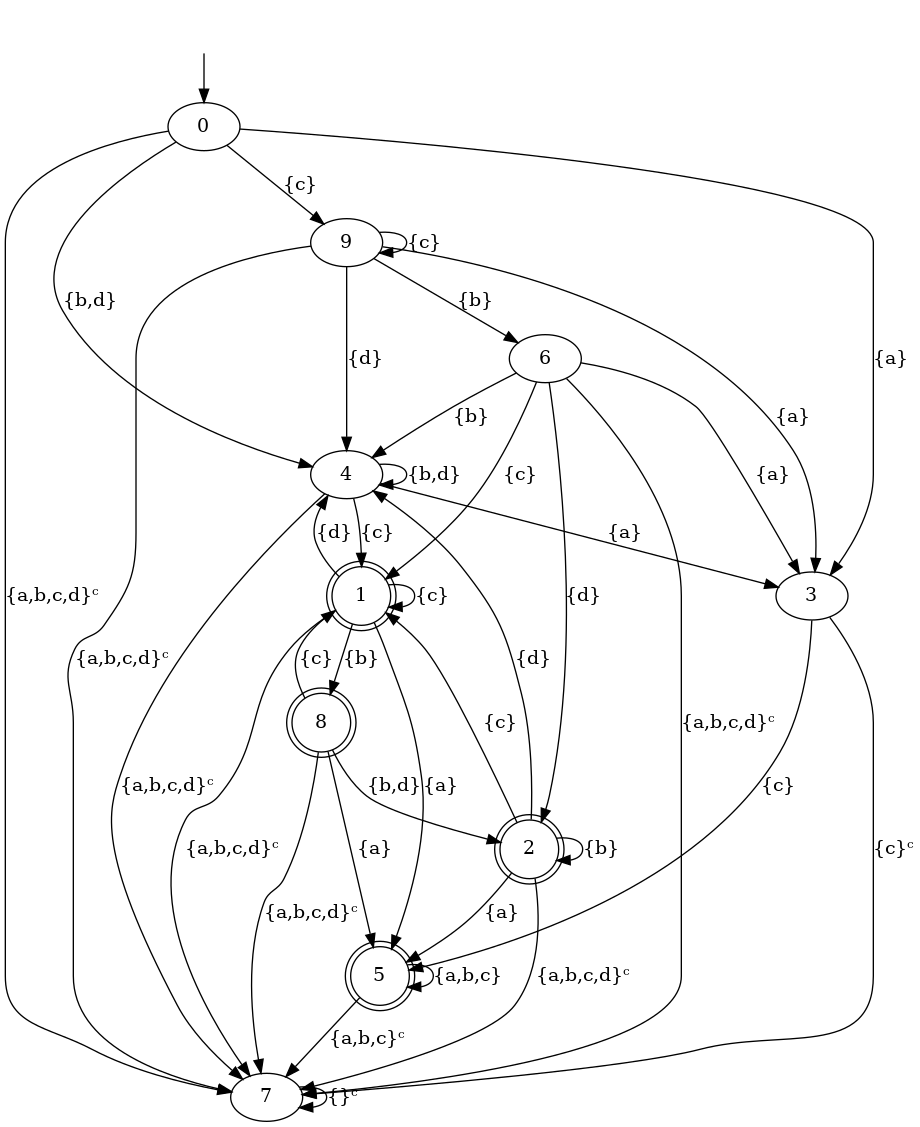

In [3]:
K.show()

## Playing with transition monoids and stamp
A stamp is the mapping from the "alphabet" to the monoids.

In [4]:
Stamp = K.transition_stamp()

In [5]:
list(Stamp.monoid) # this is the monoid

[c·b·c,
 b·c·b·b,
 d·c,
 c·d·a,
 a·a,
 c·a,
 a·c,
 b·c·b,
 c·b·b,
 a,
 c·b·c·b,
 c·b·c·b·b,
 b·c,
 b·d·a,
 c·b·d,
 d,
 d·a,
 c,
 (0),
 d·a·c,
 c·a·a,
 b,
 c·d,
 d·a·a,
 b·d,
 d·c·b,
 b·d·a·a,
 c·a·c,
 1,
 c·b,
 b·b]

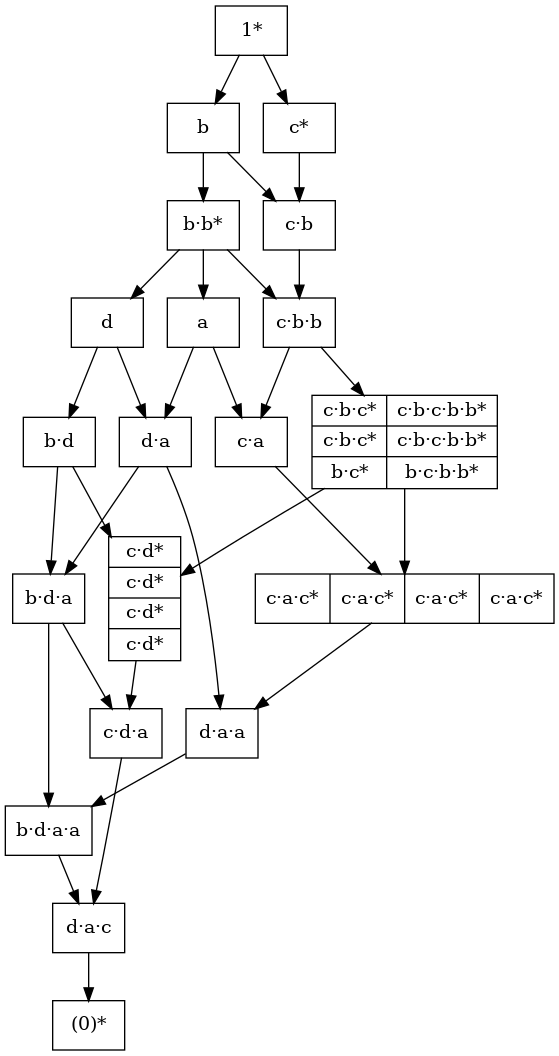

In [6]:
Stamp.monoid.show_eggbox()

In [7]:
Stamp("aba") # map a word to the monoid element

a·a

In [8]:
a, b, c, d = (Stamp(x) for x in ("a", "b", "c", "d"))

a, b, c and d are monoid element

In [9]:
a, b, c, d

(a, b, c, d)

In [10]:
a.action # this represents the action of the element

(frozenset({3}),
 frozenset({5}),
 frozenset({5}),
 frozenset({7}),
 frozenset({3}),
 frozenset({5}),
 frozenset({3}),
 frozenset({7}),
 frozenset({5}),
 frozenset({3}))

In [11]:
d + c + d + c + d + c  # + is overloaded to take place directly in the monoid

d·c

In [12]:
Stamp.monoid(d, c, d, c, d, c) # or we can perform the computation by calling the monoids

d·c

In [13]:
Stamp("dcdcdcdc") # or use the morphism

d·c

In [14]:
Stamp.monoid.is_DA()

True

## Playing with green's relations

We can display on representent for each D-class (or R or L or H)

In [15]:
print(Stamp.monoid.D_classes)

[(0), d·a·c, b·d·a·a, d·a·a, c·a·c, c·a, c·d·a, b·d·a, d·a, a, c·d, c·b·c, c·b·b, c·b, c, b·d, d, b·b, b, 1]


In [16]:
dc = d+c

In [17]:
D = Stamp.monoid.D_class_of(dc)

In [18]:
print(D)

{c·d, d·c·b, c·b·d, d·c}


In [19]:
R = Stamp.monoid.R_class_of(dc)

In [20]:
print(R)

{c·d, d·c·b, c·b·d, d·c}


In [21]:
L = Stamp.monoid.L_class_of(dc)

In [22]:
L

{d·c}

A L-trivial regular D-class

## Building some automaton representing actions over classes

In [23]:
transitions = []
for e in D:
    for f in D:
        t = tuple(filter(lambda t:e+t == f, (b, c, d)))
        if t:
            transitions.append((e,(t,),f))
SA = ca.models.finiteautomata.SemiAutomaton.from_transitions(transitions)

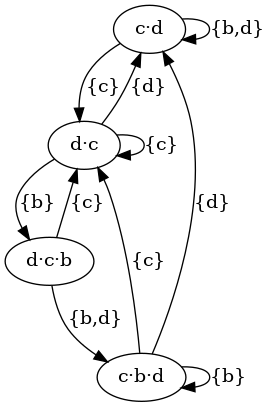

In [24]:
SA.show()

In [25]:
M = SA.transition_monoid()

In [26]:
d+c+b+b

c·b·d

In [27]:
M.is_DA()

True

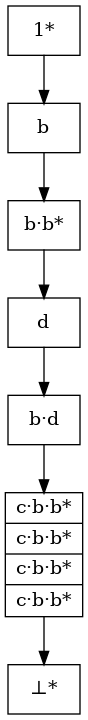

In [32]:
M.show_eggbox()

In [33]:
M.is_L()

True

In [34]:
transitions = []
for i,e in enumerate(D):
    for j,f in enumerate(D):
        t = tuple(filter(lambda t:e+t == f, (b, c, d)))
        for l in t:
            print(f"{i}.{l.rep}->{j};")

0.b->0;
0.d->0;
0.c->3;
1.b->2;
1.d->2;
1.c->3;
2.d->0;
2.b->2;
2.c->3;
3.d->0;
3.b->1;
3.c->3;


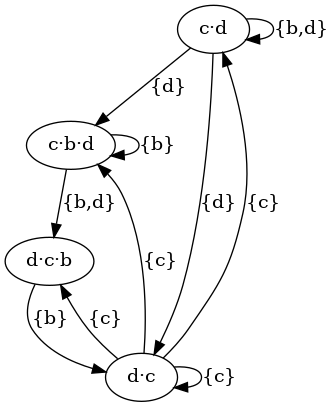

In [35]:
SA.reverse().show()

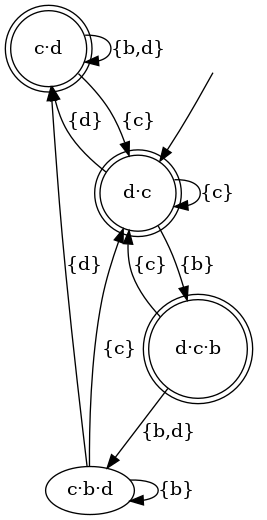

In [36]:
transitions = []
for e in D:
    for f in D:
        t = tuple(filter(lambda t:e+t == f, (b, c, d)))
        if t:
            transitions.append((e, (t,),f))
A = ca.models.Automaton.from_transitions(transitions, initial_states=[d+c], final_states=[d+c, c+d, d+c+b])
A.show()

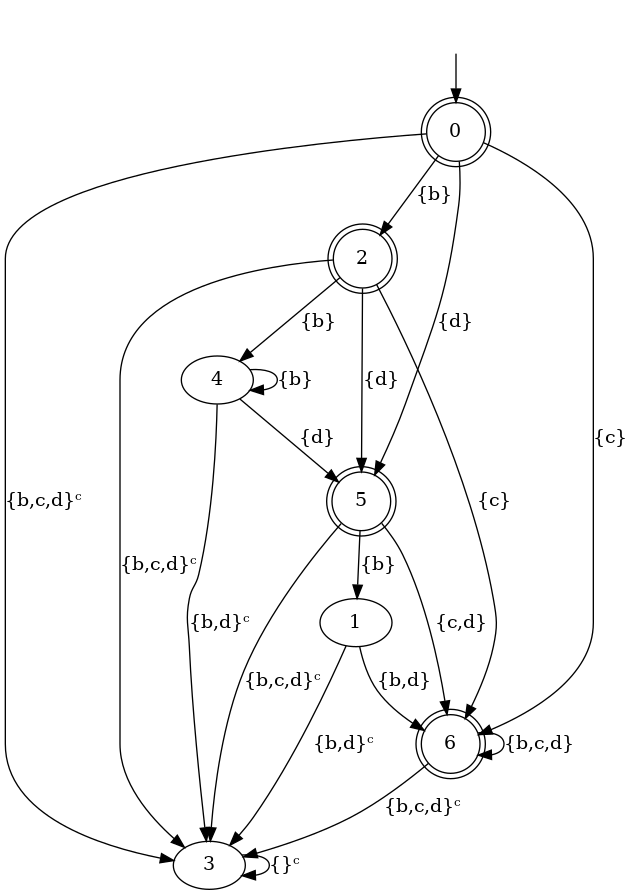

In [37]:
A.reverse().minimize().show()